# ТВиМС Задание 4

## Вариант 14

Проверка статистических гипотез.
Критерии согласия Пирсона, Колмогорова, Мизеса.

In [15]:
import math
import time
import numpy as np
import matplotlib.pyplot as plt

import base
import hist
import chi_test
import kolmogorov_test
import mises_test
import taskdata
import extras


In [16]:
from ipywidgets import interact
plt.rcParams['figure.figsize'] = [12, 8]

***

### Критерий согласия Пирсона

In [17]:
def get_chisq(n, m=None):
    vs = base.generate_varseries(taskdata.get_y, n)
    return chi_test.chi_squared(vs,
                       taskdata.Fy_deduced,
                       bincount=m)

In [18]:
# test chi_squared 20 times

successful_tries = 0
total_tries = 0

while successful_tries < 20:
    total_tries += 1
    try:
        c = get_chisq(200, 4)
        successful_tries += 1
        print(c)
    except:
        pass

print(f'{successful_tries} / {total_tries}')

1.2812493832396366
0.40168287615901027
0.6976269279553825
6.084472128069588
1.9649511966147746
5.680947122249412
1.8733561251387594
8.422917954994116
0.24304912780424298
1.8889423336503584
2.4879711484974667
3.4854015182295597
4.615138515732943
5.916653786411948
2.3467146130775385
9.494395836132103
2.1883144946306174
1.2912611775966107
13.80041103732993
3.4068998246736593
20 / 35


In [19]:
# helper funcs:
def chi_prob_of_not_exceeding_criticals(n, alphas, sample_num, m=None):
    if not m:
        m = extras.optimal_bin_count(n)

    answers = [0]*len(alphas)
    
    s_count = 0
    while s_count < sample_num:
        try:
            c = get_chisq(n, m)
        except:
            continue
        s_count += 1
        for (i, alpha) in enumerate(alphas):
            if c < chi_test.chi_critical(alpha, m-1):
                answers[i] += 1

    for i in range(len(answers)):
        answers[i] /= sample_num

    return answers


def print_chi_stuff(sample_num, n, m):
    print(f'n = {n}; m = {m}')

    answers = chi_prob_of_not_exceeding_criticals(n, [0.10, 0.05, 0.01], sample_num, m=m)
    print(f'Observed chi squared is less than xi squared 0.90 in {answers[0]*100}% of {sample_num} cases.')
    print(f'Observed chi squared is less than xi squared 0.95 in {answers[1]*100}% of {sample_num} cases.')
    print(f'Observed chi squared is less than xi squared 0.99 in {answers[2]*100}% of {sample_num} cases.')


print_chi_stuff(1_000, 200, 5)
print('')
print_chi_stuff(1_000, 1_000, 10)
print('')
print_chi_stuff(1_000, 8_000, 20)

n = 200; m = 5
Observed chi squared is less than xi squared 0.90 in 89.3% of 1000 cases.
Observed chi squared is less than xi squared 0.95 in 94.19999999999999% of 1000 cases.
Observed chi squared is less than xi squared 0.99 in 98.9% of 1000 cases.

n = 1000; m = 10
Observed chi squared is less than xi squared 0.90 in 90.60000000000001% of 1000 cases.
Observed chi squared is less than xi squared 0.95 in 95.1% of 1000 cases.
Observed chi squared is less than xi squared 0.99 in 99.0% of 1000 cases.

n = 8000; m = 20
Observed chi squared is less than xi squared 0.90 in 89.4% of 1000 cases.
Observed chi squared is less than xi squared 0.95 in 95.19999999999999% of 1000 cases.
Observed chi squared is less than xi squared 0.99 in 98.8% of 1000 cases.


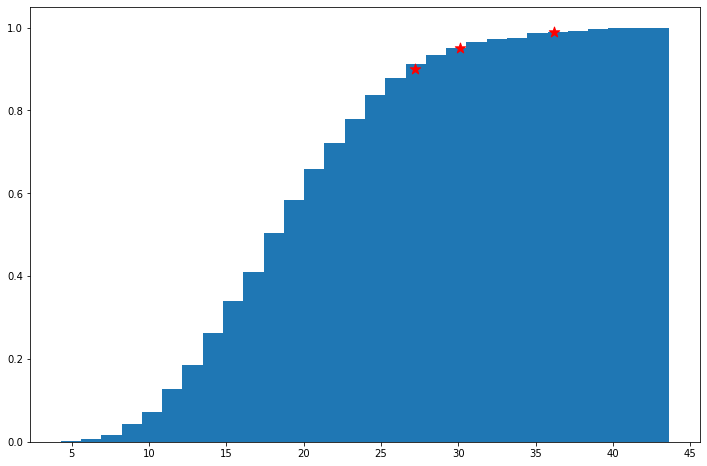

In [20]:
sample_num = 1_000
n = 1_000
m = 20

xis_vs = []
for _ in range(sample_num):
    vs = base.generate_varseries(taskdata.get_y, n)
    while True:
        success = False
        try:
            xis_vs.append(get_chisq(n, m))
            success = True
        except:
            pass
        if success:
            break
        

plt.hist(xis_vs, bins=30, cumulative=True, density=True, zorder=-1)

plt.scatter([chi_test.chi_critical(0.10, m-1),
             chi_test.chi_critical(0.05, m-1),
             chi_test.chi_critical(0.01, m-1)],
             
            [0.90, 0.95, 0.99], color='red', marker='*', s=120)

plt.show()

***

### Критерий согласия Колмогорова

In [21]:
def get_klambda(n):
    vs = base.generate_varseries(taskdata.get_y, n)
    kc = kolmogorov_test.klambda(vs, taskdata.Fy_deduced)
    return kc

In [22]:
# testing Kolmogorov criteria 20 times:

for _ in range(20):
    kc = get_klambda(30)
    print(kc)

1.108583828941615
0.9437696074743606
0.974975948419617
1.1554855107001543
0.6397256120809051
0.5743485228080828
1.266086942416007
0.4444935294774056
1.00698395658788
0.7311771964360644
0.7278251249251287
1.0924983194336007
0.589143902244236
0.8394831014011107
0.6549921310874959
0.620734993922121
1.0455831303313858
0.6173995758928321
0.7403676837500451
0.5424360727277435


In [23]:
# how often empirical lambda is less than lambda 0.90?

sample_num = 1_000
answer = 0
for _ in range(sample_num):
    klambda = get_klambda(200)
    if klambda < kolmogorov_test.klambda_090:
        answer += 1

answer /= sample_num
print(f'Observed lambda is less than lambda 0.90 in {answer*100}% of cases.')

# how often empirical lambda is less than lambda 0.95?
answer = 0
for _ in range(sample_num):
    klambda = get_klambda(200)
    if klambda < kolmogorov_test.klambda_095:
        answer += 1

answer /= sample_num
print(f'Observed lambda is less than lambda 0.95 in {answer*100}% of cases.')

# how often empirical lambda is less than lambda 0.99?
answer = 0
for _ in range(sample_num):
    klambda = get_klambda(200)
    if klambda < kolmogorov_test.klambda_099:
        answer += 1

answer /= sample_num
print(f'Observed lambda is less than lambda 0.99 in {answer*100}% of cases.')

Observed lambda is less than lambda 0.90 in 90.4% of cases.
Observed lambda is less than lambda 0.95 in 95.89999999999999% of cases.
Observed lambda is less than lambda 0.99 in 99.3% of cases.


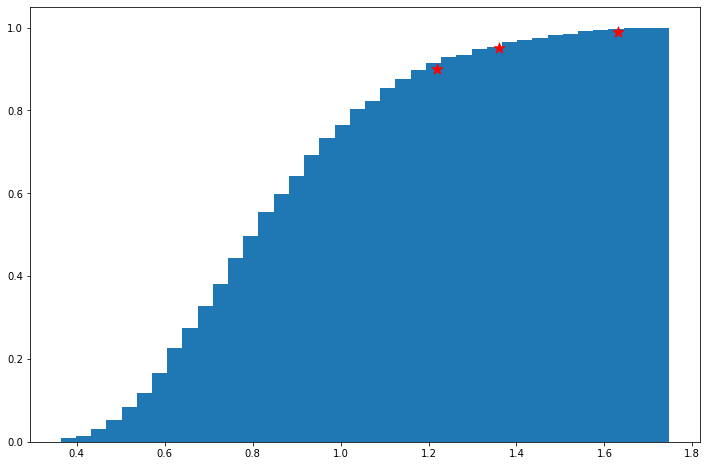

In [24]:
sample_num = 1_000

klambda_vs = [get_klambda(200) for _ in range(sample_num)]
plt.hist(klambda_vs, bins=40, cumulative=True, density=True, zorder=-1)

plt.scatter([kolmogorov_test.klambda_090, kolmogorov_test.klambda_095, kolmogorov_test.klambda_099], [0.90, 0.95, 0.99], color='red', marker='*', s=120)

plt.show()

***

### Критерий согласия Мизеса

In [25]:
def get_momega(n):
    vs = base.generate_varseries(taskdata.get_y, n)
    mo = mises_test.momega(vs, taskdata.Fy_deduced)
    return mo

In [26]:
# testing Mises criteria 20 times:

for _ in range(20):
    mo = get_momega(30)
    print(mo)

0.09692947132024732
0.3227930452583775
0.0861743230973825
0.18968802515534952
1.1992234407571867
0.4290384260675209
0.4712201815697183
0.43653866764035343
0.1889785801591324
0.19974962294102552
0.22370881512829768
0.20259707481583264
0.08158470596694337
0.0665184999867037
0.2872262258454827
0.6843740420441253
0.2800120208314509
0.13473182336521144
0.05065843213088512
0.11213107209571925


In [27]:
# how often empirical omega is less than omega 0.90?

sample_num = 10_000
answer = 0
for _ in range(sample_num):
    momega = get_momega(200)
    if momega < mises_test.momega_090:
        answer += 1

answer /= sample_num
print(f'Observed omega is less than omega 0.90 in {answer*100}% of cases.')

# how often empirical omega is less than omega 0.95?
answer = 0
for _ in range(sample_num):
    momega = get_momega(200)
    if momega < mises_test.momega_095:
        answer += 1

answer /= sample_num
print(f'Observed omega is less than omega 0.95 in {answer*100}% of cases.')

# how often empirical omega is less than omega 0.99?
answer = 0
for _ in range(sample_num):
    momega = get_momega(200)
    if momega < mises_test.momega_099:
        answer += 1

answer /= sample_num
print(f'Observed omega is less than omega 0.99 in {answer*100}% of cases.')

Observed omega is less than omega 0.90 in 88.9% of cases.
Observed omega is less than omega 0.95 in 94.61% of cases.
Observed omega is less than omega 0.99 in 98.85000000000001% of cases.


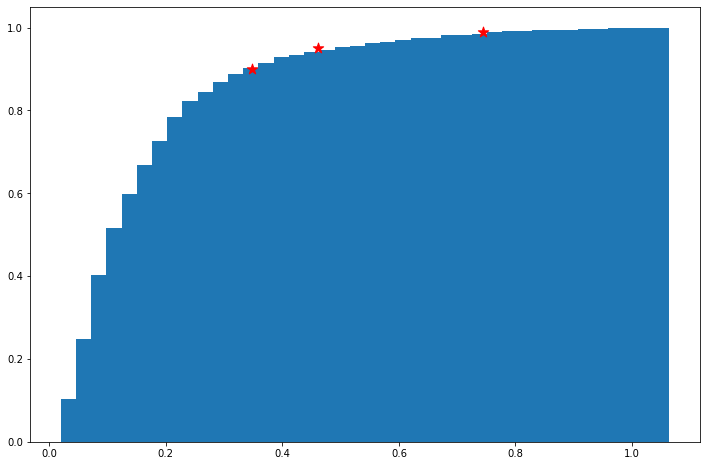

In [28]:
sample_num = 1_000

momega_vs = [get_momega(200) for _ in range(sample_num)]
plt.hist(momega_vs, bins=40, cumulative=True, density=True, zorder=-1)

plt.scatter([mises_test.momega_090, mises_test.momega_095, mises_test.momega_099], [0.90, 0.95, 0.99], color='red', marker='*', s=120)

plt.show()